# MLPRegressor

In [14]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
seed=123
kfold = model_selection.KFold(n_splits=5)

Proszę narysować wykres dowolnej funkcji na odcinku $[0,3]$.

Będzie to model, który będziemy chcieli znaleźć.

In [2]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))

# Zadanie
Wykonaj regresję z różnymi parametrami.

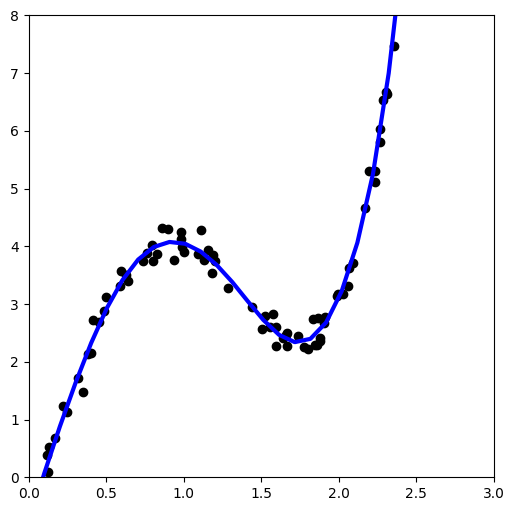

In [3]:
x=np.vstack(x)
x_plot = np.vstack(np.linspace(0, 10, 100))

MLP = MLPRegressor(hidden_layer_sizes=(12, 100,10), activation='tanh', max_iter=5000)
y_rbf = MLP.fit(x,y)

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x_plot, MLP.predict(x_plot), color='blue',linewidth=3)
plt.show()



In [4]:
from sklearn import  metrics

metrics.r2_score(y, MLP.predict(x))

0.9958772578803743

# Zad

Wyznacz optymalne parametry dla modelu MLPRegressin.

In [6]:
import pandas as pd
df_adv = pd.read_csv('Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [15]:
from sklearn.linear_model import LinearRegression
grid_4 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2),  MLPRegressor(random_state=42)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4]},
                    cv=kfold,
                    refit=True)
grid_4.fit(X, y)
grid_4.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

{'polynomialfeatures__degree': 1}